## 设计基函数(basis function) 以及数据读取

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    feat = [x]
    for i in range(2, feature_num+1):
        feat.append(x**i)
    ret = np.concatenate(feat, axis=1)
    return ret

def gaussian_basis(x, feature_num=10):
    centers = np.linspace(0, 25, feature_num)
    width = 1.0 * (centers[1] - centers[0])
    x = np.expand_dims(x, axis=1)
    x = np.concatenate([x]*feature_num, axis=1)
    
    out = (x-centers)/width
    ret = np.exp(-0.5 * out ** 2)
    return ret

def load_data(filename, basis_func=gaussian_basis):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        xs, ys = np.asarray(xs), np.asarray(ys)
        
        o_x, o_y = xs, ys
        phi0 = np.expand_dims(np.ones_like(xs), axis=1)
        phi1 = basis_func(xs)
        xs = np.concatenate([phi0, phi1], axis=1)
        return (np.float32(xs), np.float32(ys)), (o_x, o_y)

## 定义模型

In [6]:
import tensorflow as tf
from tensorflow.keras import optimizers, layers, Model

class linearModel(Model):
    def __init__(self, ndim):
        super(linearModel, self).__init__()
        self.w = tf.Variable(
            shape=[ndim, 1], 
            initial_value=tf.random.uniform(
                [ndim,1], minval=-0.1, maxval=0.1, dtype=tf.float32))
        
    @tf.function
    def call(self, x):
        y = tf.squeeze(tf.matmul(x, self.w), axis=1)
        return y

(xs, ys), (o_x, o_y) = load_data('train.txt')        
ndim = xs.shape[1]

model = linearModel(ndim=ndim)


## 训练以及评估

In [15]:
optimizer = optimizers.Adam(0.1)
@tf.function
def train_one_step(model, xs, ys):
    with tf.GradientTape() as tape:
        y_preds = model(xs)
        loss = tf.reduce_mean(tf.sqrt(1e-12+(ys-y_preds)**2))
    grads = tape.gradient(loss, model.w)
    optimizer.apply_gradients([(grads, model.w)])
    return loss

@tf.function
def predict(model, xs):
    y_preds = model(xs)
    return y_preds

def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

loss is 1.278
loss is 1.233
loss is 1.188
loss is 1.143
loss is 1.098
loss is 1.051
loss is 1.002
loss is 0.9516
loss is 0.8993
loss is 0.8452
loss is 0.7891
loss is 0.731
loss is 0.6714
loss is 0.6093
loss is 0.5446
loss is 0.4779
loss is 0.424
loss is 0.3918
loss is 0.3677
loss is 0.3544
loss is 0.3437
loss is 0.3341
loss is 0.326
loss is 0.3194
loss is 0.3138
loss is 0.3091
loss is 0.3052
loss is 0.302
loss is 0.2994
loss is 0.2971
loss is 0.2949
loss is 0.2932
loss is 0.2929
loss is 0.2914
loss is 0.2906
loss is 0.29
loss is 0.2897
loss is 0.2893
loss is 0.2889
loss is 0.2888
loss is 0.2887
loss is 0.2887
loss is 0.2889
loss is 0.2882
loss is 0.2882
loss is 0.2883
loss is 0.2882
loss is 0.2884
loss is 0.2883
loss is 0.288
loss is 0.2879
loss is 0.2879
loss is 0.2881
loss is 0.288
loss is 0.2881
loss is 0.288
loss is 0.2878
loss is 0.2878
loss is 0.288
loss is 0.2878
loss is 0.288
loss is 0.2878
loss is 0.2878
loss is 0.2878
loss is 0.2885
loss is 0.2876
loss is 0.2877
loss is 0.287

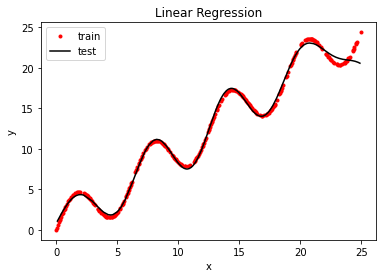

In [17]:
for i in range(10000):
    loss = train_one_step(model, xs, ys)
    if i % 100 == 1:
        print(f'loss is {loss:.4}')
        
        
y_preds = predict(model, xs)
std = evaluate(ys, y_preds)
print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

(xs_test, ys_test), (o_x_test, o_y_test) = load_data('test.txt')

y_test_preds = predict(model, xs_test)
std = evaluate(ys_test, y_test_preds)
print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

plt.plot(o_x, o_y, 'ro', markersize=3)
plt.plot(o_x_test, y_test_preds, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend(['train', 'test', 'pred'])
plt.show()
